<a href="https://colab.research.google.com/github/MatthewRomanishin/courses/blob/main/My_first_steps/visualization_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Визуальный анализ данных о публикациях на Хабрахабре


In [ ]:
# df = pd.read_csv('/content/gdrive/My Drive/Introduction to DS/data/howpop_train.csv')
df = pd.read_csv('/content/gdrive/My Drive/notebooks/Introduction to DS/data/howpop_train.csv')
print(df.shape)

(134137, 17)


In [ ]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [ ]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [ ]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/company/skbkontur/blog/28...,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [ ]:
# настройка внешнего вида графиков в seaborn
sns.set_style("whitegrid")
# sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [ ]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

datetime64[ns]
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [ ]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]
df

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
97666,https://habrahabr.ru/post/251783/,habrahabr.ru,251783,2015-03-01 00:00:00,@SLY_G,develop,False,49647,Введение в разработку слайд-шоу на JavaScript,6,375,42900,15.0,4.0,2015,3,7,0
97667,https://habrahabr.ru/company/kolibrios/blog/23...,habrahabr.ru,239033,2015-03-01 00:09:00,NaN,develop,False,8581,Дайджест KolibriOS #7: как мы зиму перезимовали,14,22,17600,36.0,2.0,2015,3,7,0
97668,https://habrahabr.ru/post/286286/,habrahabr.ru,286286,2015-03-01 07:13:00,@semen_grinshtein,misc,False,1883,"9 марта компания Apple сделает то, что не дела...",12,3,9300,16.0,4.0,2015,3,7,7
97669,https://habrahabr.ru/post/251347/,habrahabr.ru,251347,2015-03-01 07:52:00,@Makeman,develop,False,48658,Context Model Pattern via Aero Framework,6,66,6600,8.0,4.0,2015,3,7,7
97670,https://habrahabr.ru/post/251765/,habrahabr.ru,251765,2015-03-01 10:30:00,@Doomer3D,develop,False,40374,Заполнение текстовых шаблонов данными на основ...,4,39,6200,5.0,1.0,2015,3,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99850,https://geektimes.ru/post/248196/,geektimes.ru,248196,2015-03-31 22:53:00,@alizar,NaN,True,2671,Гражданский кодекс Франции теперь на Github,15,10,7000,12.0,2.0,2015,3,2,22
99851,https://habrahabr.ru/post/254561/,habrahabr.ru,254561,2015-03-31 22:54:00,@LOGX,develop,False,5534,Управление складом: на «волнах» операций,1,39,5600,10.0,1.0,2015,3,2,22
99852,https://habrahabr.ru/post/254563/,habrahabr.ru,254563,2015-03-31 22:54:00,@NikolayJuly,develop,False,8917,Облегчаем поддержку iOS приложения. Часть 1 — ...,7,83,6200,3.0,2.0,2015,3,2,22
99853,https://habrahabr.ru/post/254565/,habrahabr.ru,254565,2015-03-31 23:03:00,@Ludoedushka,develop,False,10489,Топ-5 самых дурацких антивирусов. Записки хули...,34,117,85300,92.0,22.0,2015,3,2,23


-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку. Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* март 2015
* апрель 2015
* апрель 2016

<BarContainer object of 4 artists>

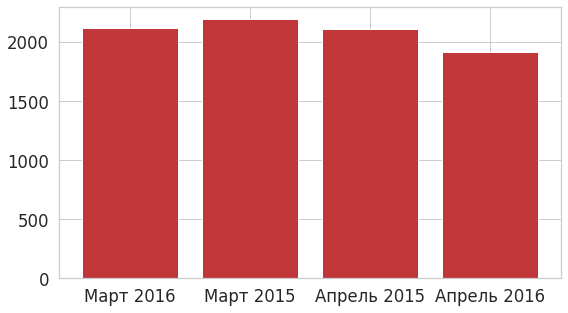

In [ ]:
data = {'Март 2016': df[(df['year'] == 2016) & (df['month'] == 3)].shape[0],
        'Март 2015': df[(df['year'] == 2015) & (df['month'] == 3)].shape[0],
        'Апрель 2015': df[(df['year'] == 2015) & (df['month'] == 4)].shape[0],
        'Апрель 2016': df[(df['year'] == 2016) & (df['month'] == 4)].shape[0]
        }
names = list(data.keys())
values = list(data.values())
fig, axs = plt.subplots(figsize=(9, 5), sharey=True)
axs.bar(names, values)

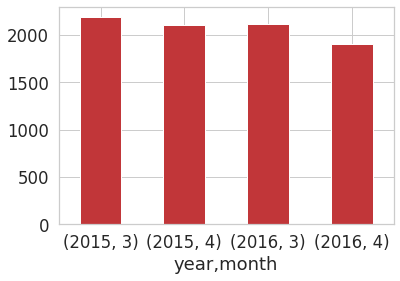

In [ ]:
fig, ax = plt.subplots()

(df[(df['year'].isin([2015, 2016])) & (df['month'].isin([3, 4]))]
 .groupby(['year', 'month']).size().plot(kind='bar', ax=ax))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);

In [ ]:
pd.DataFrame.plot?

## 2\. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины
* На хабре _всегда_ больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

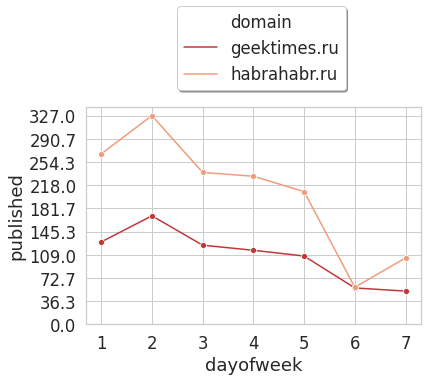

In [ ]:
df = df[(df['year'] == 2015) & (df['month'] == 3)]
data = df.groupby(['domain', 'dayofweek'], as_index=False)['published'].count()

fig, ax = plt.subplots()

sns.lineplot(data['dayofweek'], data['published'], hue=data['domain'], ax=ax, marker='o')
ax.set_xticks(data['dayofweek'].unique())
ax.set_yticks(np.linspace(0, data['published'].max(), 10))
ax.legend(bbox_to_anchor=(0.8, 1.5), loc=1, 
          frameon=True, shadow=True, fancybox=True); # 

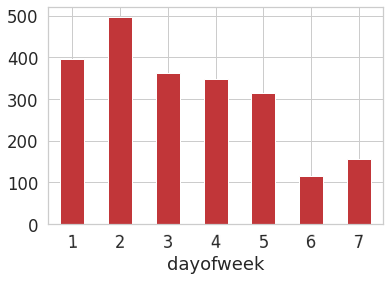

In [ ]:
march = df[(df['year'] == 2015) & (df['month'] == 3)]
march.groupby('dayofweek')['published'].count().plot(kind='bar', rot=2)

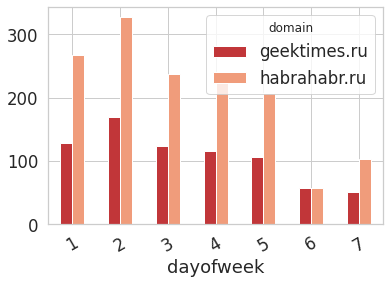

In [ ]:
march.pivot_table(index='dayofweek', values='title', aggfunc='count', columns='domain').plot(kind = 'bar', rot=30);

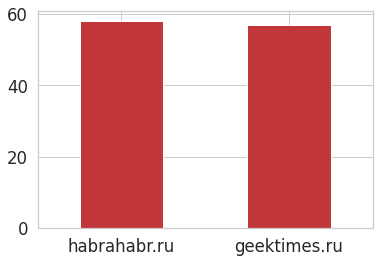

In [ ]:
march[march['dayofweek'] ==6]['domain'].value_counts().plot(kind = 'bar', rot=0)

## 3\. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
* У опубликованных в 10 утра постов больше всего комментариев
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
* На хабре дневные статьи комментируют чаще, чем вечерние

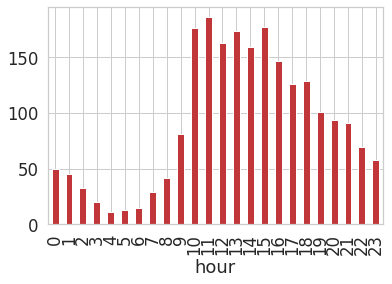

In [ ]:
df.groupby('hour')['views'].count().sort_values(ascending=False).plot(kind='bar')

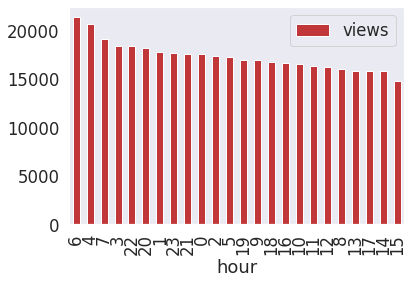

In [ ]:
df.groupby('hour')[['views']].mean().sort_values('views', ascending=False).plot(kind='bar')

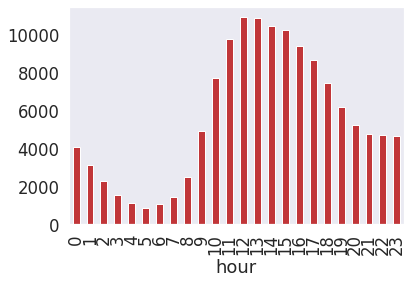

In [ ]:
df.groupby('hour')['comments'].count().plot(kind='bar')

In [ ]:
df[df['domain']=='geektimes.ru'].sort_values('comments', ascending=False).head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
38763,https://geektimes.ru/post/123157/,geektimes.ru,123157,2011-07-01 02:35:00,@Dottore,NaN,False,2158,Как раздавать инвайты на Google+,2266,24,15300,226.0,55.0,2011,7,5,2
65285,https://geektimes.ru/post/171853/,geektimes.ru,171853,2013-03-06 20:07:00,@vadimus,NaN,False,2220,Лучшие компьютерные игры всех времен и народов...,1887,392,160000,170.0,29.0,2013,3,3,20
38742,https://geektimes.ru/post/123122/,geektimes.ru,123122,2011-06-30 17:10:00,@MetallicAt,NaN,False,1390,Раздача слонов или инвайты на Google+,1829,17,1200,275.0,50.0,2011,6,4,17
126328,https://geektimes.ru/post/276000/,geektimes.ru,276000,2016-05-18 21:43:00,@alizar,NaN,False,5207,Завершено самое масштабное исследование влияни...,1578,234,165000,76.0,7.0,2016,5,3,21
127407,https://geektimes.ru/post/276928/,geektimes.ru,276928,2016-06-07 12:28:00,@veam,NaN,False,4832,«10 лет за школьную форму и хентай» сегодня ве...,1214,56,130000,40.0,6.0,2016,6,2,12


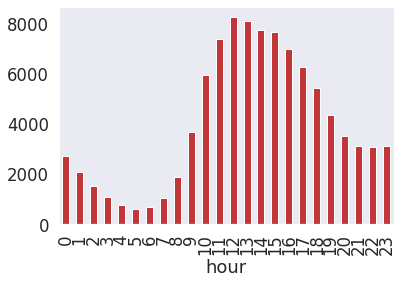

In [ ]:
df[df['domain'] == 'habrahabr.ru'].groupby('hour')['comments'].count().plot(kind='bar')

## 4\. Кого из топ-20 авторов чаще всего минусуют?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

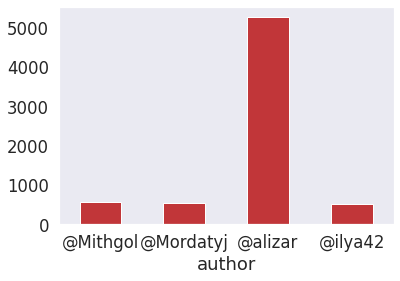

In [ ]:
df[df['author'].isin(['@Mordatyj','@Mithgol','@alizar','@ilya42'])].groupby('author')['votes_minus'].count().plot(kind='bar', rot=0)

## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3692: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


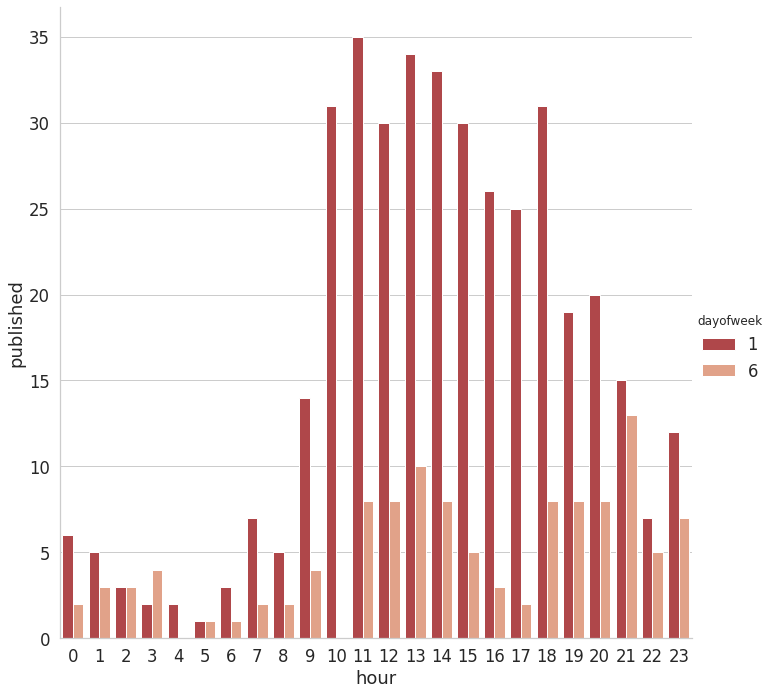

In [ ]:
data = df[df['dayofweek'].isin([6, 1])].groupby(['dayofweek', 'hour'], as_index=False)['published'].count()

# fig, ax= plt.subplots(figsize=(10, 10))
sns.catplot(x="hour", y="published", hue="dayofweek", kind="bar", data=data, size=10);